## Imports et environnement

## Documentation
Documentation de scikit-image : http://scikit-image.org/docs/0.nn.x/ où nn est le numéro de version (a priori 18 ; taper 'pip3 show scikit-image' en ligne de commande pour afficher le numéro de version)

Consulter l'API pour la documentation des fonctions (paramètres, valeur de retour, etc.). La Gallery contient de nombreux exemples intéressants.

Dans le notebook, l'onglet "Aide" du menu contient d'autres liens très utiles vers diverses documentations.

In [1]:
# visionneuse externe interactive
#%matplotlib 

#imports
import numpy as np # tableaux
import scipy.ndimage as scp # correlation et convolution
import matplotlib.pyplot as plt # visionneur et tracés
import skimage

from skimage import color # gestion de la couleur
from skimage import data # petite banque d'images
from skimage import io # lecture et sauvegarde d'images
from skimage import util # conversions entier <-> flottants etc.
from skimage import filters as flt # 'filter' ou 'filters' suivant la version de skimage

# chemin d'accès à mes images 
my_path = "Images/"

## Préliminaire

1. Charger une image

  - une image de la base de scikit : module `data`
  
    ```python
    I = data.astronaut()
    ```
    
  - une image dans un répertoire : module `io`
  
    ```python
    J = io.imread(mypath + "/blob.png")
    ```
    
  
2. Afficher une/des images

  - module `pyplot` de `matplotlib`

    ```python
    plt.subplot(1,2,1)
    plt.imshow(I)

    plt.subplot(1,2,2)
    plt.imshow(J, cmap = 'gray') # J est une image en niveaux de gris

    plt.show()
    ```
    
3. Afficher des informations sur une image

  - type de données : 
    ```python
    print(I.dtype)
    >>> uint8 # les intensités sont stockées sous forme d'entier non signé (1 octet) 
    ```
  - format : 
    ```python
    print(I.shape)
    >>> (512, 512, 3) # la taille de l'image est 512 x 512 ; il y a 3 couleurs (rgb)
    ```

4. Convertir l'image

  - couleur vers niveaux de gris : module `color`

    ```python
    I = color.rgb2gray( I ) # Attention : peut modifier le type de données !
    ``` 
    
  - changer le type de données : `module util`
  
    ```python
    I = util.img_as_ubyte( I )
    ```

In [3]:
# Bac à sable
# Ctrl + Entrée pour exécuter

print( "Hello world!")

Hello world!


## Transformations des niveaux de gris

Appliquer une fonction `f` sur une image `I`:
```python
J = f( I )
```
Attention au type des données !
```python
I = data.astronaut()[:, :, 0] # premier plan de couleur (rouge)
print( I.dtype )
>>> uint8
II = 2*I
print( I.dtype )
>>> uint8 # C'est quoi le problème ?
```

Solution possible : **passer en flottant, transformer, revenir en octets ...**

0.0 1.0


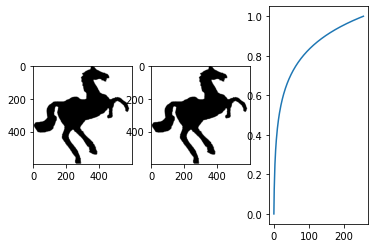

In [8]:
import math
# Lecture d'une image
I  = io.imread(my_path + "cheval.png", as_gray=True)

# Convertir si nécessaire (gris, flottant)
I = util.img_as_float64(I)

# Vérifier min et max
print( I.min(), I.max() )

# Transformer avec une fonction telle que :
def f( img ):
    max = img.max() + 1
    return np.log1p(img)/np.log(max) #log1p(x) = log(1+x) avec un calcul plus robuste quand x ~ 0

J = f(I)

# Convertir en uint 8
J = util.img_as_ubyte(I)

# Représentations de I et J
plt.subplot(1,3,1)
plt.imshow(I, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(J, cmap = 'gray') 

# Représentation de f
X = np.arange(0, 256) # [[0, 255]]
Y = f( X )
plt.subplot(1,3,3)
plt.plot(X, Y)
plt.show()

## Négatif

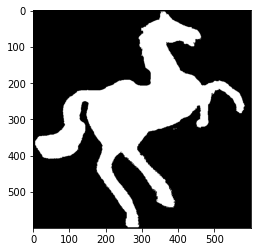

In [9]:
from skimage.util import invert as inv
# Tester sur une image en niveaux de gris
K = util.invert(I)
plt.imshow(K, cmap='gray')
plt.show()

## Dual

In [5]:
# Écrire une fonction dual et tester avec la fonction f définie plus haut et plusieurs images

def dual( op ):
    # definir la fonction po = dual(op) ici
    return po

I =    # penser aux conversions éventuelles

J =    # idem


# Représentations de I et J
plt.subplot(1,3,1)
plt.imshow(I, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(J, cmap = 'gray') 

# Représentation de f
X = np.arange(0, 256, dtype='uint8')
Y = dual(f)( X )
plt.subplot(1,3,3)
plt.plot(X, Y)

plt.show()

SyntaxError: invalid syntax (953945358.py, line 7)

## Rehaussement de contraste
Pour tout ce qui concerne les réhaussements de contraste, le module de référence est `exposure`

In [ ]:
# Tester différents rehaussement de contraste (log, power, cos, etc.) avec leurs duaux

I = 
print(I.dtype)
print(I.shape)

I =    # Conversions événtuelles
print(I.dtype, I.max(), I.min())

J =   # Choisir un rehaussement de contraste pour rehausser les zones sombres/grises/claires de I

J_dual = 

plt.subplot(1,3,1)
plt.imshow(I, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(J, cmap='gray')

plt.subplot(1,3,3)
plt.imshow(J_dual, cmap='gray')

plt.show()

## Histogramme

In [ ]:
import math
from skimage.exposure import histogram

I = 
hI = histogram(I);

# Rehaussement de contraste
J =   # Choisir un rehaussement de contraste pour rehausser les zones sombres/grises/claires de I
hJ = histogram(J)

# Affichage des courbes et de leurs histogrammes
plt.subplot(2,2,1)
plt.imshow(I, cmap='gray')

plt.subplot(2,2,3)
plt.bar(hI[1],hI[0], width=0.002)

plt.subplot(2,2,2)
plt.imshow(J, cmap='gray')

plt.subplot(2,2,4)
plt.bar(hJ[1],hJ[0], width=0.002)

plt.show()

## Normalisation

In [ ]:
from skimage.exposure import rescale_intensity as norm

# Normaliser l'image "fish.png" et comparer avec l'original (afficher les images et les histogrammes)
...

# Que peut-on en déduire ?

# Enregistrer l'image normalisée (io.imsave) et comparer avec l'original (hors du notebook)


## Égalisation

In [ ]:
from skimage.exposure import equalize_hist as equ

# Égaliser l'image "livingRoom.png" et comparer avec l'original (afficher les images et les histogrammes)


## Spécification d'histogramme

In [ ]:
from skimage.transform import match_histograms
from skimage.exposure import cumulative_distribution as histogramc


I = 
J = 

K = match_histograms(I, J)

plt.subplot(2,3,1)
plt.imshow(J, cmap='gray')

plt.subplot(2,3,2)
plt.imshow(I, cmap='gray')

plt.subplot(2,3,3)
plt.imshow(K, cmap='gray')

hI = histogramc(I)
hJ = histogramc(J)
hK = histogramc(K)

plt.subplot(2,3,4)
plt.bar(hJ[1],hJ[0], width=1)

plt.subplot(2,3,5)
plt.bar(hI[1],hI[0], width=1)

plt.subplot(2,3,6)
plt.bar(hK[1],hK[0], width=1)

## Seuillage manuel ou guidé par l'histogramme

In [ ]:
from skimage.exposure import histogram

I = 
h = histogram(I);

J = I > ?

plt.subplot(1,3,1)
plt.imshow(I, cmap='gray')

plt.subplot(1,3,2)
plt.bar(h[1],h[0], width=1)

plt.subplot(1,3,3)
plt.imshow(J, cmap='gray')

plt.show()

## Seuillage automatique : 2-moyennes

In [ ]:
I = 

#initialisation
seuil = 

# itérations


#résultat
print(seuil)

plt.subplot(1,2,1)
plt.imshow(I, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(J, cmap='gray')

plt.show()

## Seuillage automatique : Otsu

In [ ]:
from flt import threshold_otsu
I = 

seuil = 
print(seuil)

J = 

plt.subplot(1,2,1)
plt.imshow(I, cmap='gray')

plt.subplot(1,2, 2)
plt.imshow(J, cmap='gray')

plt.show()